**Import**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
pip install swifter

In [0]:
#%pip install langdetect
#from langdetect import detect
import pandas as pd
import numpy as np
from textblob import TextBlob
import spacy
#import swifter
pd.set_option('display.max_columns', 500)

**Calculate sentiment score for each review**

In [0]:
pathreviews = '/content/gdrive/My Drive/BT4222 project/10klistings_2yrs_reviews.csv'
df_reviews = pd.read_csv(pathreviews)
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r\nNous avons app...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


In [0]:
df_reviews.shape

(837519, 6)

In [0]:
def detect_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [0]:
%%time
df_reviews['comments'] = df_reviews['comments'].map(str)

CPU times: user 309 ms, sys: 0 ns, total: 309 ms
Wall time: 311 ms


In [0]:
%%time
df_reviews['sentiment'] = df_reviews['comments'].apply(detect_sentiment)

CPU times: user 9min 6s, sys: 1.22 s, total: 9min 8s
Wall time: 9min 8s


In [0]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment
0,3831,20509269,2014-09-30,20417598,Courtney,"lisa is a wonderful, kind and thoughtful host....",0.458333
1,3831,22232975,2014-11-02,6050386,Monica,The best thing about this place is the locatio...,0.395337
2,3831,22550887,2014-11-09,15051380,Lynette,LisaRoxanne was friendly and helpful. The room...,0.357857
3,3831,22984049,2014-11-19,7279245,Linnea,LisaRoxanne is very nice and communicative. Th...,0.537778
4,3831,23604706,2014-12-06,16310850,Benjamin,Lisa was a very pleasant and nice host that ac...,0.298528


In [0]:
df_reviews[df_reviews.sentiment == 1].head()

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,language,sentiment
194,194,6848,357799760,2018-12-11,311435,Joseph,Excellent space.,fr,1.0
199,199,6848,406173460,2019-01-28,31602761,Matteo,Everything was perfect!,en,1.0
222,222,6848,464434801,2019-06-05,11082130,Emily,Great stay!,en,1.0
234,234,6848,509531889,2019-08-14,191614229,Madeline,Wonderful!,de,1.0
353,353,7322,320663,2011-06-18,595587,Shelley,doti was a wonderful hostess,en,1.0


In [0]:
df_reviews[df_reviews.sentiment == -1].head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,sentiment
2680,29455,12692033,2014-05-08,13610699,Audrey,nous avons séjourné 1 semaine dans l'apparteme...,fr,-1.0
3383,39267,174323646,2017-07-25,82595088,Hugues,Il est inadmissible de louer un logement de la...,fr,-1.0
5034,58059,61143311,2016-01-31,56622047,Uchenna,Terrible experience. No wifi in the room. Adve...,en,-1.0
16713,456526,294072965,2018-07-21,61410972,Marco,we explained badly for the check in but for th...,en,-1.0
19853,571564,20777051,2014-10-05,6849735,Mélodie,Nous avions notre étage avec notre salle de ba...,fr,-1.0


In [0]:
df_reviews.to_csv('/content/gdrive/My Drive/BT4222 project/reviews_2yrs_scores.csv', index = False)

**Calculate max/min/avg sentiment score for each listing**

In [0]:
df_reviews = pd.read_csv("/content/gdrive/My Drive/BT4222 project/reviews_2yrs_scores.csv")

In [0]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r\nNous avons app...,0.000000
1,2595,19176,2009-12-05,53267,Cate,Great experience.,0.800000
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...,0.410124
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en...",0.266875
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...,0.518750


In [0]:
df_reviews.shape

(837519, 7)

In [0]:
# minimum sentiment score for each listing
sentiment_min = df_reviews.groupby(by='listing_id')['sentiment'].min()

In [0]:
# maximum sentiment score for each listing
sentiment_max = df_reviews.groupby(by='listing_id')['sentiment'].max()

In [0]:
# average sentiment score for each listing
sentiment_avg = df_reviews.groupby(by='listing_id')['sentiment'].mean()

In [0]:
listing_sentiment = pd.DataFrame({"sentiment_min": sentiment_min, "sentiment_max": sentiment_max, "sentiment_avg": sentiment_avg})
listing_sentiment = listing_sentiment.reset_index()

In [0]:
listing_sentiment.head()

,listing_id,sentiment_min,sentiment_max,sentiment_avg
0,2595,0.000000,0.855000,0.337270
1,3831,-0.700000,1.000000,0.350261
2,5099,-0.170513,0.821875,0.310538
3,5203,0.000000,1.000000,0.428167
4,5238,-0.187500,0.900000,0.356268


In [0]:
listing_sentiment.listing_id

0            2595
1            3831
2            5099
3            5203
4            5238
           ...   
23694    40453780
23695    40468283
23696    40473913
23697    40504835
23698    40535633
Name: listing_id, Length: 23699, dtype: int64

In [0]:
listing_sentiment.shape

(23699, 4)

In [0]:
listing_sentiment.to_csv('/content/gdrive/My Drive/BT4222 project/listing_sentiment.csv', index = False)

**Merge with listings data**

In [0]:
listing_sentiment = pd.read_csv("/content/gdrive/My Drive/BT4222 project/listing_sentiment.csv")
listing_sentiment.head()

,listing_id,sentiment_min,sentiment_max,sentiment_avg
0,2595,0.000000,0.855000,0.337270
1,3831,-0.700000,1.000000,0.350261
2,5099,-0.170513,0.821875,0.310538
3,5203,0.000000,1.000000,0.428167
4,5238,-0.187500,0.900000,0.356268


In [0]:
path_lisings = '/content/gdrive/My Drive/BT4222 project/10klistings_2yrs.csv'
df_listings = pd.read_csv(path_lisings)
#df_listings.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,7,9,10,11,12,13,14,26,29,31,43,47,52,55,56,65,67,68,106) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df_listings.shape

(100000, 108)

In [0]:
df_listings[df_listings.id.isna()].id

2085     NaN
19241    NaN
48031    NaN
81400    NaN
Name: id, dtype: object

In [0]:
df_listings.loc[ [2085,19241,48031,81400] , : ]

In [0]:
df_listings[(df_listings.id.str.isdigit() == False)]

In [0]:
listing_sentiment.listing_id = listing_sentiment.listing_id.astype('str')
df_listings.loc[:,'id2'] = df_listings.id.astype('str')
df_listings.loc[:,'id2'] = df_listings.id2.str.split(".").apply(lambda x: x[0])

In [0]:
df_listings['id2']

0        28440971
1        21799470
2        16406203
3        19554150
4        25801507
           ...   
99995     3907279
99996     3411006
99997    11637578
99998    14744794
99999    40395633
Name: id2, Length: 100000, dtype: object

In [0]:
listing_sentiment.listing_id

0            2595
1            3831
2            5099
3            5203
4            5238
           ...   
23694    40453780
23695    40468283
23696    40473913
23697    40504835
23698    40535633
Name: listing_id, Length: 23699, dtype: object

In [0]:
df_merge = df_listings[['id', 'id2', 'price']].merge(listing_sentiment, left_on='id2', right_on='listing_id',how='left')
df_merge.head()

,id,id2,price,listing_id,sentiment_min,sentiment_max,sentiment_avg
0,2.8441e+07,28440971,$475.00,NaN,NaN,NaN,NaN
1,2.17995e+07,21799470,$60.00,21799470,0.544722,0.544722,0.544722
2,1.64062e+07,16406203,$80.00,NaN,NaN,NaN,NaN
3,1.95542e+07,19554150,$225.00,NaN,NaN,NaN,NaN
4,2.58015e+07,25801507,$280.00,25801507,0.167937,0.737500,0.413909


In [0]:
df_merge.listing_id.isnull().sum()

47121

In [0]:
#df_merge2 = df_merge.dropna()

In [0]:
df_merge.sentiment_avg.mean()

0.3700366847329518

In [0]:
df_merge.sentiment_avg.median()

0.3804029270993557

In [0]:
df_merge.sentiment_avg = df_merge.sentiment_avg.fillna(df_merge.sentiment_avg.median())
df_merge.sentiment_min = df_merge.sentiment_min.fillna(df_merge.sentiment_min.median())
df_merge.sentiment_max = df_merge.sentiment_max.fillna(df_merge.sentiment_max.median())
df_merge.head()

,id,id2,price,listing_id,sentiment_min,sentiment_max,sentiment_avg
0,2.8441e+07,28440971,$475.00,NaN,0.000000,0.800000,0.380403
1,2.17995e+07,21799470,$60.00,21799470,0.544722,0.544722,0.544722
2,1.64062e+07,16406203,$80.00,NaN,0.000000,0.800000,0.380403
3,1.95542e+07,19554150,$225.00,NaN,0.000000,0.800000,0.380403
4,2.58015e+07,25801507,$280.00,25801507,0.167937,0.737500,0.413909


In [0]:
df_merge.loc[:,'has_reviews'] = np.where(df_merge.listing_id.isna(), 0 ,1)

In [0]:
df_merge.head()

,id,id2,sentiment_min,sentiment_max,sentiment_avg,has_reviews
0,2.8441e+07,28440971,0.000000,0.800000,0.380403,0
1,2.17995e+07,21799470,0.544722,0.544722,0.544722,1
2,1.64062e+07,16406203,0.000000,0.800000,0.380403,0
3,1.95542e+07,19554150,0.000000,0.800000,0.380403,0
4,2.58015e+07,25801507,0.167937,0.737500,0.413909,1


In [0]:
df_merge.shape

(100000, 8)

In [0]:
df_merge=df_merge.drop(columns = ['price', 'listing_id'])

In [0]:
df_merge.to_csv('/content/gdrive/My Drive/BT4222 project/10klistings_2yrs_reviews_sentiment.csv', index = False)

**Check correlation**

In [0]:
df_merge2 = df_merge
df_merge2.price = df_merge2.price.str.replace('$', '').str.replace(',', '').astype(float)
df_merge2.head()

,id,id2,price,listing_id,sentiment_min,sentiment_max,sentiment_avg,has_reviews
0,2.8441e+07,28440971,475.0,NaN,0.000000,0.800000,0.380403,0
1,2.17995e+07,21799470,60.0,21799470,0.544722,0.544722,0.544722,1
2,1.64062e+07,16406203,80.0,NaN,0.000000,0.800000,0.380403,0
3,1.95542e+07,19554150,225.0,NaN,0.000000,0.800000,0.380403,0
4,2.58015e+07,25801507,280.0,25801507,0.167937,0.737500,0.413909,1


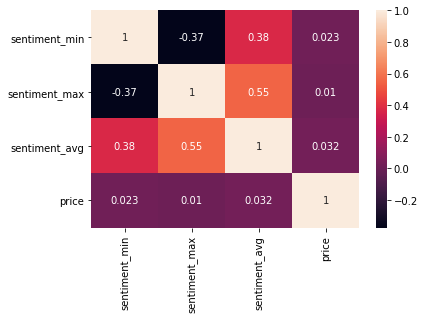

In [0]:
import seaborn as sns
corr = df_merge2[['sentiment_min', 'sentiment_max', 'sentiment_avg', 'price']].corr()
sns.heatmap(corr, annot = True)

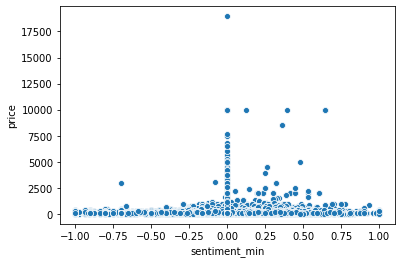

In [0]:
sns.scatterplot(x='sentiment_min', y='price', data=df_merge2)

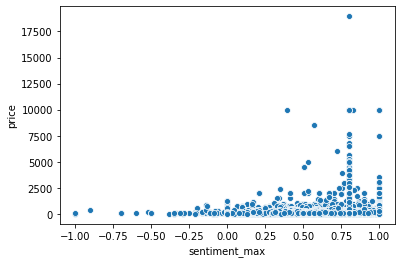

In [0]:
sns.scatterplot(x='sentiment_max', y='price', data=df_merge2)

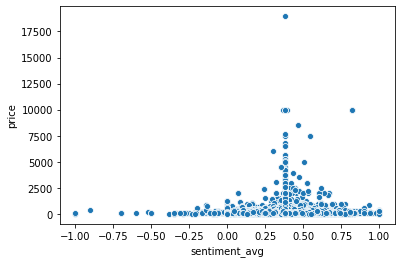

In [0]:
sns.scatterplot(x='sentiment_avg', y='price', data=df_merge2)

**Others**

In [0]:
# change to lower case & remove punctuation
# import re
# df_reviews['comments'] = df_reviews['comments'].map(lambda x: x.lower())
# df_reviews['comments'] = df_reviews['comments'].map(lambda x: re.sub('[,\.!?]', '', x))

In [0]:
print(detect_sentiment("This raspberry cake is good."))
print(detect_sentiment("This raspberry cake is GOOD!"))
print(detect_sentiment("This raspberry cake is VERY GOOD!!"))
print(detect_sentiment("This raspberry cake is really GOOD! But the coffee is dreadful."))

0.7
0.875
1.0
-0.0625


In [0]:
# DETECT LANGUAGE

# library: lang_detect
# not accurate for short text
def detect_lang(text):
    try:
      return detect(text)
    except:
      return None

# library: textblob
# does not work for length < 3
def detect_lang_textblob(text):
    try:
      blob = TextBlob(text)
      return blob.detect_language()
    except:
      return None

# library: googletrans   
# too many request
from googletrans import Translator
translator = Translator()

def detect_lang_google(text):
  #translator = Translator()
  return translator.detect(text).lang

# library: spacy
# not accurate
from spacy_langdetect import LanguageDetector
nlp = spacy.load("en")
nlp.add_pipe(LanguageDetector(), name="language_detector", last=True)

def detect_lang_spacy(text):
  return nlp(text)._.language

df_reviews['language'] = df_reviews['comments'].swifter.apply(detect_lang)

In [0]:
# TRANSLATE

# library: googletrans   
# too many request
from googletrans import Translator
translator = Translator()

def translate_google(text):
  return translator.translate(text)

# library: translate
from translate import Translator
translator= Translator(from_lang = 'autodetect', to_lang="en")

def translate_py(text):
  return translator.translate(text)

df_reviews['translate_py'] = df_reviews['comments'].apply(translate_py)